# Tasca 7: Pràctica amb training i test sets

In [38]:
# Llibreries i métodes que s'utilitzaran 
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from statsmodels.graphics.mosaicplot import mosaic
from scipy.stats import chi2_contingency

pd.set_option('display.max_columns', None)

## Exercici 1
__Parteix el conjunt de dades DelayedFlights.csv en train i test. Estudia els dos conjunts per separat, a nivell descriptiu.__

<span style='color:blue;font-size:20px'> <b> Lectura i eliminació de variables </b><span>

In [2]:
# Càrrega de la base de dades
data_airlines = pd.read_csv('DelayedFlights.csv')
data_airlines.head()

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,335,N712SW,128.0,150.0,116.0,-14.0,8.0,IAD,TPA,810,4.0,8.0,0,N,0,NaN,NaN,NaN,NaN,NaN
1,1,2008,1,3,4,754.0,735,1002.0,1000,WN,3231,N772SW,128.0,145.0,113.0,2.0,19.0,IAD,TPA,810,5.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
2,2,2008,1,3,4,628.0,620,804.0,750,WN,448,N428WN,96.0,90.0,76.0,14.0,8.0,IND,BWI,515,3.0,17.0,0,N,0,NaN,NaN,NaN,NaN,NaN
3,4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,3920,N464WN,90.0,90.0,77.0,34.0,34.0,IND,BWI,515,3.0,10.0,0,N,0,2.0,0.0,0.0,0.0,32.0
4,5,2008,1,3,4,1940.0,1915,2121.0,2110,WN,378,N726SW,101.0,115.0,87.0,11.0,25.0,IND,JAX,688,4.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN


In [3]:
# S'utilitza la primera columna com a variable identificadora
data_air = data_airlines.rename(columns={"Unnamed: 0": "ID"})
data_air = data_air.set_index('ID')
data_air.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,335,N712SW,128.0,150.0,116.0,-14.0,8.0,IAD,TPA,810,4.0,8.0,0,N,0,NaN,NaN,NaN,NaN,NaN
1,2008,1,3,4,754.0,735,1002.0,1000,WN,3231,N772SW,128.0,145.0,113.0,2.0,19.0,IAD,TPA,810,5.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
2,2008,1,3,4,628.0,620,804.0,750,WN,448,N428WN,96.0,90.0,76.0,14.0,8.0,IND,BWI,515,3.0,17.0,0,N,0,NaN,NaN,NaN,NaN,NaN
4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,3920,N464WN,90.0,90.0,77.0,34.0,34.0,IND,BWI,515,3.0,10.0,0,N,0,2.0,0.0,0.0,0.0,32.0
5,2008,1,3,4,1940.0,1915,2121.0,2110,WN,378,N726SW,101.0,115.0,87.0,11.0,25.0,IND,JAX,688,4.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN


In [4]:
# S'eliminen les variables que no són d'interès
data_air = data_air.drop(['TailNum','ActualElapsedTime', 'CRSElapsedTime','TaxiIn','TaxiOut','Diverted','CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay','CancellationCode'], axis=1)
data_air[:3]

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,Cancelled
ID,,,,,,,,,,,,,,,,,
0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,335,116.0,-14.0,8.0,IAD,TPA,810,0
1,2008,1,3,4,754.0,735,1002.0,1000,WN,3231,113.0,2.0,19.0,IAD,TPA,810,0
2,2008,1,3,4,628.0,620,804.0,750,WN,448,76.0,14.0,8.0,IND,BWI,515,0


In [5]:
# Es converteix en string les variables Month, DayofMonth, DayofWeek i FlightNum per treballar amb el groupby més endevant
data_air['Year'] = data_air['Year'].apply(str)
data_air['Month'] = data_air['Month'].apply(str)
data_air['DayofMonth'] = data_air['DayofMonth'].apply(str)
data_air['DayOfWeek'] = data_air['DayOfWeek'].apply(str)
data_air['FlightNum'] = data_air['FlightNum'].apply(str)
data_air[:3]

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,Cancelled
ID,,,,,,,,,,,,,,,,,
0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,335,116.0,-14.0,8.0,IAD,TPA,810,0
1,2008,1,3,4,754.0,735,1002.0,1000,WN,3231,113.0,2.0,19.0,IAD,TPA,810,0
2,2008,1,3,4,628.0,620,804.0,750,WN,448,76.0,14.0,8.0,IND,BWI,515,0


<span style='color:blue;font-size:20px'> <b> Partició del dataset en mostra d'entrenament i mostra de prova </b><span>

In [6]:
# Es creen les mostres d'entrenament (80%) i de prova (20%)
train_set,train_test = train_test_split(data_air,test_size=0.2,random_state=3)
train_copy = train_set.copy()
test_copy = train_test.copy()

In [7]:
# Es comprova les dimensións de les dues mostres
print(train_copy.shape)
print(test_copy.shape)

(1549406, 17)
(387352, 17)


<span style='color:blue;font-size:20px'> <b> Descriptius de les mostres </b><span>

In [8]:
# Descriptiu de les variables numèriques de la mostra d'entrenament
train_copy[['AirTime','ArrDelay','DepDelay','Distance']].describe().round(3)

,AirTime,ArrDelay,DepDelay,Distance
count,1542695.000,1542695.000,1549406.000,1549406.000
mean,108.253,42.212,43.202,765.563
std,68.625,56.842,53.468,574.505
min,0.000,-109.000,6.000,11.000
25%,58.000,9.000,12.000,338.000
50%,90.000,24.000,24.000,606.000
75%,137.000,56.000,53.000,998.000
max,1091.000,2461.000,2467.000,4962.000


In [9]:
# Descriptiu de les variables numèriques de la mostra de prova
test_copy[['AirTime','ArrDelay','DepDelay','Distance']].describe().round(3)

,AirTime,ArrDelay,DepDelay,Distance
count,385676.000,385676.000,387352.000,387352.000
mean,108.374,42.151,43.119,766.179
std,68.712,56.556,53.138,574.377
min,1.000,-61.000,6.000,30.000
25%,58.000,9.000,12.000,338.000
50%,90.000,24.000,24.000,607.000
75%,137.000,56.000,53.000,998.000
max,655.000,1395.000,1403.000,4962.000


<span style='color:blue'> Totes les mitjanes i desviacions típiques de la mostra d'entrenament s'assemblen a les de la mostra de prova. Això indica que la divisió és bona. </span>

In [10]:
# Descriptiu de les variables categòriques de la mostra d'entrenament
train_copy.describe(include='object')

,Year,Month,DayofMonth,DayOfWeek,UniqueCarrier,FlightNum,Origin,Dest
count,1549406,1549406,1549406,1549406,1549406,1549406,1549406,1549406
unique,1,12,31,7,20,7488,303,304
top,2008,12,22,5,WN,16,ATL,ORD
freq,1549406,162751,57283,259137,302300,1283,104925,87168


In [11]:
train_copy['Cancelled'].sum()

493

In [12]:
# Descriptiu de les variables categòriques de la mostra de prova
test_copy.describe(include='object')

,Year,Month,DayofMonth,DayOfWeek,UniqueCarrier,FlightNum,Origin,Dest
count,387352,387352,387352,387352,387352,387352,387352,387352
unique,1,12,31,7,20,7396,300,301
top,2008,12,22,5,WN,50,ATL,ORD
freq,387352,40634,14366,64122,75302,307,26688,21816


In [13]:
test_copy['Cancelled'].sum()

140

<span style='color:blue'> Tots els tops coincideixen excepte en 'FlightNum'. Les freqüencies relatives són semblants. </span>

## Exercici 2
__Aplica algun procés de transformació (estandardització de dades numèriques, creació de columnes dummies, polinomis...)__

<span style='color:blue;font-size:15px'> <b> Estandardització </b><span>

In [14]:
# S'estandardització de Distance i AirTime
scaler = preprocessing.StandardScaler().fit(train_copy[['Distance','AirTime']])
X_scaled = scaler.transform(train_copy[['Distance','AirTime']])

In [15]:
train_copy['Distance_Scaled'] = X_scaled[:,0]
train_copy['AirTime_Scaled'] = X_scaled[:,1]

In [16]:
train_copy[['Distance_Scaled','AirTime_Scaled']].head()

,Distance_Scaled,AirTime_Scaled
ID,,
2128913,-0.413509,-0.528274
116208,-0.961807,-0.863428
4872164,-0.921772,-0.980003
6298556,-0.423953,-0.499130
6372449,-0.317774,-0.382555


<span style='color:blue;font-size:15px'> <b> Variables dummy </b><span>

In [17]:
# Creació de la variable Tard_Arr, que indica si un vol arriba tard (més de 5 minuts)
train_copy['Tard_Arr'] = np.where(train_copy['ArrDelay']<=5, 'No', 'Yes')

In [18]:
# Creació de la variable Sortida, que indica el moment del dia en el que surt el vol
train_copy['Sortida'] = np.where((train_copy['CRSDepTime'] > 1200) & (train_copy['CRSDepTime'] <= 2000), 'Tarda',
                               np.where((train_copy['CRSDepTime'] > 400) & (train_copy['CRSDepTime'] <= 1200), 'Mati', 'Nit'))

In [19]:
# S'obté les variables dummy
dummy_TA = pd.get_dummies(train_copy['Tard_Arr'],prefix = 'Tard_Arr')
dummy_Sort = pd.get_dummies(train_copy['Sortida'],prefix = 'Sortida')

In [20]:
dummy_TA.head()

,Tard_Arr_No,Tard_Arr_Yes
ID,,
2128913,0,1
116208,1,0
4872164,1,0
6298556,0,1
6372449,0,1


In [21]:
dummy_Sort.head()

,Sortida_Mati,Sortida_Nit,Sortida_Tarda
ID,,,
2128913,1,0,0
116208,0,0,1
4872164,1,0,0
6298556,0,1,0
6372449,0,0,1


In [22]:
# S'uneixen les taules
train_copy = train_copy.merge(dummy_TA,left_index=True,right_index=True)
train_copy = train_copy.merge(dummy_Sort,left_index=True,right_index=True)

In [23]:
train_copy.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,Cancelled,Distance_Scaled,AirTime_Scaled,Tard_Arr,Sortida,Tard_Arr_No,Tard_Arr_Yes,Sortida_Mati,Sortida_Nit,Sortida_Tarda
ID,,,,,,,,,,,,,,,,,,,,,,,,,,
2128913,2008,4,1,2,1342.0,1105,1515.0,1250,EV,4914,72.0,145.0,157.0,ATL,CAK,528,0,-0.413509,-0.528274,Yes,Mati,0,1,1,0,0
116208,2008,1,22,2,1943.0,1930,2056.0,2058,XE,1281,49.0,-2.0,13.0,EWR,IAD,213,0,-0.961807,-0.863428,No,Tarda,1,0,0,0,1
4872164,2008,9,11,4,852.0,840,951.0,950,WN,1004,41.0,1.0,12.0,LAS,LAX,236,0,-0.921772,-0.980003,No,Mati,1,0,1,0,0
6298556,2008,11,12,3,2206.0,2115,2338.0,2300,MQ,4035,74.0,38.0,51.0,ORD,XNA,522,0,-0.423953,-0.499130,Yes,Nit,0,1,0,1,0
6372449,2008,11,14,5,1558.0,1540,1744.0,1725,AA,1050,82.0,19.0,18.0,DFW,OMA,583,0,-0.317774,-0.382555,Yes,Tarda,0,1,0,0,1


<span style='color:blue;font-size:15px'> <b> Polinomis </b><span>

In [24]:
# S'eliminen les observacions amb nulls per a que el mètode funcioni
train_copy = train_copy.dropna()

In [25]:
# Es crea el polinomi amb les varables ARRDelay i Distance
poly = PolynomialFeatures(2)
polinomi_ADDist = poly.fit_transform(train_copy[['ArrDelay','Distance']])
polinomi_ADDist

array([[ 1.00000e+00,  1.45000e+02,  5.28000e+02,  2.10250e+04,
         7.65600e+04,  2.78784e+05],
       [ 1.00000e+00, -2.00000e+00,  2.13000e+02,  4.00000e+00,
        -4.26000e+02,  4.53690e+04],
       [ 1.00000e+00,  1.00000e+00,  2.36000e+02,  1.00000e+00,
         2.36000e+02,  5.56960e+04],
       ...,
       [ 1.00000e+00, -4.00000e+00,  1.88000e+02,  1.60000e+01,
        -7.52000e+02,  3.53440e+04],
       [ 1.00000e+00,  1.40000e+01,  7.42000e+02,  1.96000e+02,
         1.03880e+04,  5.50564e+05],
       [ 1.00000e+00,  3.40000e+01,  4.03000e+02,  1.15600e+03,
         1.37020e+04,  1.62409e+05]])

## Exercici 3
__Resumeix les noves columnes generades de manera estadística i gràfica__

<span style='color:blue;font-size:15px'> <b> Variables estandarditzades </b><span> 

In [26]:
# Descriptiu
train_copy[['Distance_Scaled','AirTime_Scaled']].describe().round(3)

,Distance_Scaled,AirTime_Scaled
count,1542695.000,1542695.000
mean,-0.001,-0.000
std,0.999,1.000
min,-1.313,-1.577
25%,-0.744,-0.732
50%,-0.278,-0.266
75%,0.403,0.419
max,7.304,14.320


<span style='color:blue'> Les variables estandarditzades tenen mitja 0 i desviació tipus 1 </span>

<AxesSubplot:>

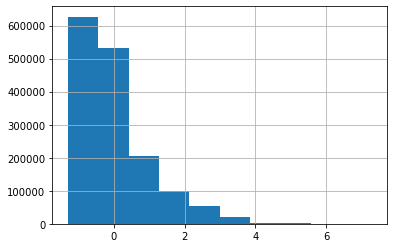

In [27]:
# Histograma de Distance
train_copy['Distance_Scaled'].hist()

<AxesSubplot:>

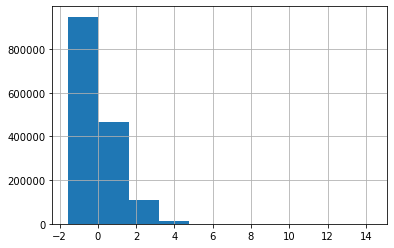

In [28]:
# Histograma de AirTime
train_copy['AirTime_Scaled'].hist()

<span style='color:blue'> Les distribucions de la Distància y el Temps de vol no són normals. Sembla més que siguin exponencials o chi-quadrat, per exemple. </span>

<AxesSubplot:xlabel='Distance_Scaled', ylabel='AirTime_Scaled'>

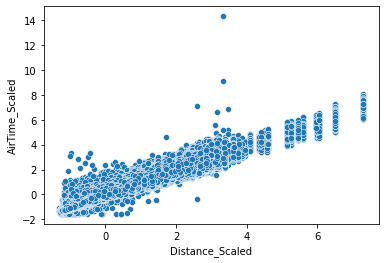

In [58]:
# Gràfic de dispersió Distance vs AirTime estandarditzats
sns.scatterplot(x='Distance_Scaled',y='AirTime_Scaled',data=train_copy)

<span style='color:blue'> Existeix correlació lineal positiva entre la Distancia i el Temps de vol: a més distància, més temps de vol. </span>

<span style='color:blue;font-size:15px'> <b> Variables dummies </b><span> 

In [29]:
# Descriptiu de la variable Tard en l'arribada
train_copy.iloc[:,-5:-3].sum()/train_copy.shape[0]

Tard_Arr_No     0.188398
Tard_Arr_Yes    0.811602
dtype: float64

<span style='color:blue'> El 81% dels vols sofreix endarreriments en l'arribada de com a mínim 5 minuts </span>

In [30]:
# Descriptiu de la variable moment de la sortida
train_copy.iloc[:,-3:].sum()/train_copy.shape[0]

Sortida_Mati     0.277236
Sortida_Nit      0.116119
Sortida_Tarda    0.606646
dtype: float64

<span style='color:blue'> El 60% del les sortides de vols són programades per la tarda (de 12:00 a 20:00) </span>

<AxesSubplot:>

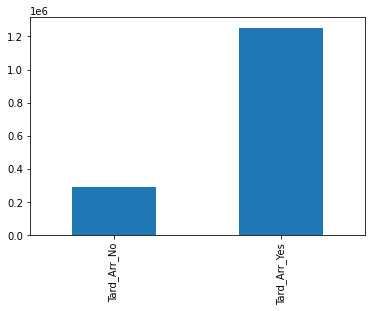

In [31]:
# Gràfic de barres de Arr_Tard
train_copy.iloc[:,-5:-3].sum().plot.bar()

<AxesSubplot:>

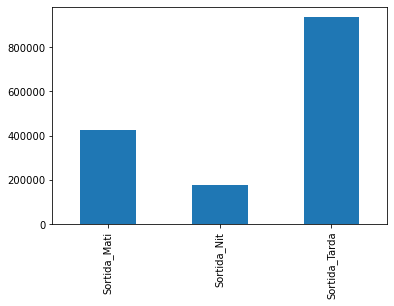

In [32]:
# Gràfic de barres de Sortida
train_copy.iloc[:,-3:].sum().plot.bar()

In [36]:
# Taula de contingència de les variables Arriba Tard i Moment de Sortida
taula_creu = pd.crosstab(train_copy["Tard_Arr"],train_copy["Sortida"])
taula_creu

Sortida,Mati,Nit,Tarda
Tard_Arr,,,
No,90426,29472,170742
Yes,337264,149664,765127


(<Figure size 720x576 with 3 Axes>,
 {('Yes', 'Mati'): (0.0, 0.0, 0.8075646000322594, 0.26758446200539027),
  ('Yes', 'Tarda'): (0.0,
   0.270895720283536,
   0.8075646000322594,
   0.6070499568907392),
  ('Yes', 'Nit'): (0.0,
   0.8812569354524208,
   0.8075646000322594,
   0.1187430645475791),
  ('No', 'Mati'): (0.8125397244103688,
   0.0,
   0.18746027558963127,
   0.30906672281131564),
  ('No', 'Tarda'): (0.8125397244103688,
   0.3123779810894614,
   0.18746027558963127,
   0.583578510453295),
  ('No', 'Nit'): (0.8125397244103688,
   0.8992677498209021,
   0.18746027558963127,
   0.1007322501790978)})

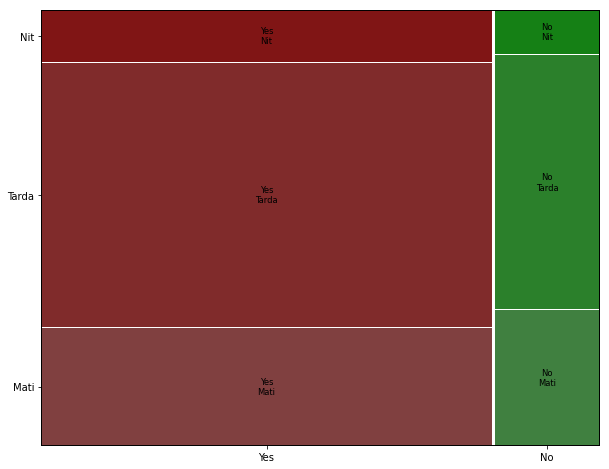

In [40]:
# Mosaic plot
plt.rcParams["figure.figsize"]=(10, 8)
mosaic(train_copy,["Tard_Arr","Sortida"])

<span style='color:blue'> 
    <p> El grup predominant és el format per els vols que surten de tarda i arriben tard al seu destí </p>
    <p> El grup que menys apareix és el format per els vols nocturns que no sofreixen endarreriment a l'arribada </p>
<span>

<span style='color:blue;font-size:15px'> <b> Polinomis </b><span>

In [41]:
# Es creas un nou DataFrame amb els polinomis
df_poli = pd.DataFrame(polinomi_ADDist)
df_poli = df_poli.rename(columns={0:'1',1:'ArrDelay',2:'Distance',3:'ArrDelay2',4:'ArrXDist',5:'Distance2'})

In [42]:
# Descriptiu
df_poli.describe().round(3)

,1,ArrDelay,Distance,ArrDelay2,ArrXDist,Distance2
count,1542695.0,1542695.000,1542695.000,1542695.000,1542695.000,1.542695e+06
mean,1.0,42.212,764.797,5012.828,31301.824,9.142453e+05
std,0.0,56.842,573.873,24453.146,62279.329,1.485162e+06
min,1.0,-109.000,11.000,0.000,-195178.000,1.210000e+02
25%,1.0,9.000,338.000,100.000,3825.000,1.142440e+05
50%,1.0,24.000,606.000,625.000,13132.000,3.672360e+05
75%,1.0,56.000,997.000,3136.000,35880.000,9.940090e+05
max,1.0,2461.000,4962.000,6056521.000,9775092.000,2.462144e+07


array([[<AxesSubplot:title={'center':'1'}>,
        <AxesSubplot:title={'center':'ArrDelay'}>],
       [<AxesSubplot:title={'center':'Distance'}>,
        <AxesSubplot:title={'center':'ArrDelay2'}>],
       [<AxesSubplot:title={'center':'ArrXDist'}>,
        <AxesSubplot:title={'center':'Distance2'}>]], dtype=object)

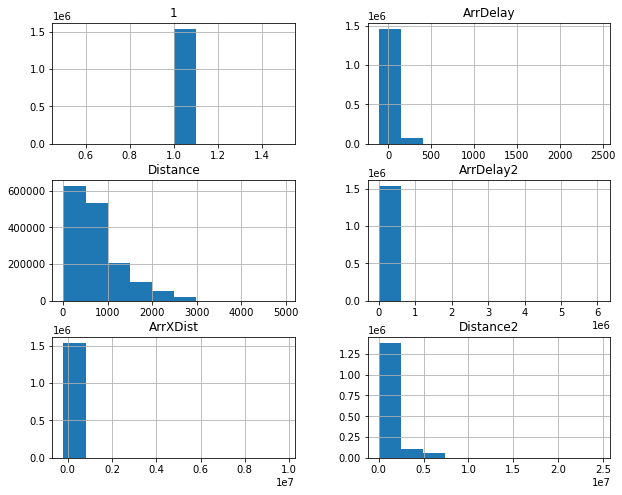

In [43]:
# Histogrames
df_poli.hist()

array([[<AxesSubplot:title={'center':'1'}>,
        <AxesSubplot:title={'center':'ArrDelay'}>],
       [<AxesSubplot:title={'center':'Distance'}>,
        <AxesSubplot:title={'center':'ArrDelay2'}>],
       [<AxesSubplot:title={'center':'ArrXDist'}>,
        <AxesSubplot:title={'center':'Distance2'}>]], dtype=object)

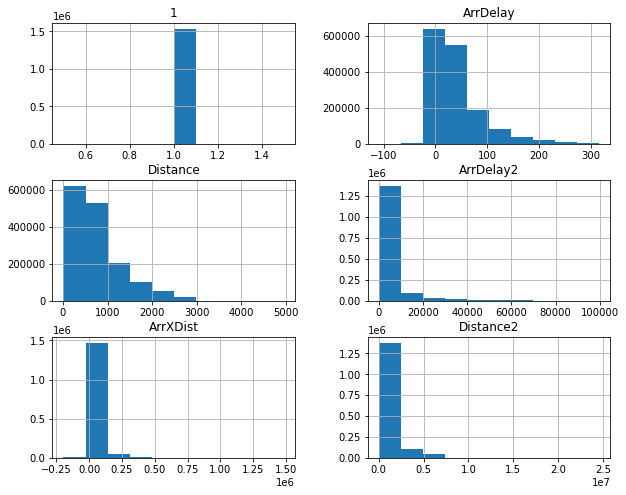

In [46]:
# Histogrames excloent dades atípiques
df_poli[df_poli['ArrDelay2']<100000].hist()